In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [3]:
x, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.5, random_state = 42)


In [4]:
db = DBSCAN(eps = 0.3, min_samples = 7).fit(x)

In [5]:
db.fit(x)

DBSCAN(eps=0.3, min_samples=7)

In [6]:
core_sample_mask = np.zeros_like(db.labels_, dtype = bool)
core_sample_mask[db.core_sample_indices_]=True
labels = db.labels_
labels

array([ 0,  0, -1,  1, -1,  1,  2,  1,  3,  2, -1,  2,  3,  3,  0,  3, -1,
       -1,  3, -1, -1,  3,  1,  0,  3,  4, -1, -1,  1,  2,  3,  2,  0,  2,
       -1,  3,  0,  1,  0, -1, -1,  3,  0,  1,  3,  3,  0,  2,  0, -1,  1,
        4,  1, -1,  1, -1,  0,  2,  2,  3,  0, -1,  2, -1,  1,  1,  1,  1,
       -1,  3,  1, -1,  0,  2,  3,  0, -1,  1,  3,  1,  3,  3,  0,  3,  1,
        0,  0, -1, -1, -1, -1,  3,  0,  3,  3,  0,  1,  3, -1,  4,  2,  2,
        2,  3,  3,  3,  3,  3, -1, -1,  2,  3,  3,  3,  3,  2,  0, -1, -1,
       -1, -1,  1, -1,  0,  1,  0,  0,  3,  0,  1,  2,  3,  3, -1,  3,  2,
        2,  0,  3,  1,  3,  2, -1,  3,  2,  2,  2,  2,  1,  3, -1, -1,  2,
       -1,  3,  2,  1,  0, -1,  2, -1,  0,  1,  0,  2,  0,  1, -1,  3, -1,
       -1, -1,  1,  2,  2,  1,  1, -1, -1,  1,  0,  3,  0, -1,  2, -1,  1,
       -1, -1,  2,  1, -1,  1, -1,  2, -1,  1, -1,  2,  0,  3,  3,  1,  2,
        3, -1,  1,  0,  1,  3,  3,  1, -1,  2,  0,  1,  4,  0, -1, -1, -1,
       -1,  0,  1, -1,  2

In [8]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [14]:
n_clusters_

5

[ 0  0 -1  1 -1  1  2  1  3  2 -1  2  3  3  0  3 -1 -1  3 -1 -1  3  1  0
  3  4 -1 -1  1  2  3  2  0  2 -1  3  0  1  0 -1 -1  3  0  1  3  3  0  2
  0 -1  1  4  1 -1  1 -1  0  2  2  3  0 -1  2 -1  1  1  1  1 -1  3  1 -1
  0  2  3  0 -1  1  3  1  3  3  0  3  1  0  0 -1 -1 -1 -1  3  0  3  3  0
  1  3 -1  4  2  2  2  3  3  3  3  3 -1 -1  2  3  3  3  3  2  0 -1 -1 -1
 -1  1 -1  0  1  0  0  3  0  1  2  3  3 -1  3  2  2  0  3  1  3  2 -1  3
  2  2  2  2  1  3 -1 -1  2 -1  3  2  1  0 -1  2 -1  0  1  0  2  0  1 -1
  3 -1 -1 -1  1  2  2  1  1 -1 -1  1  0  3  0 -1  2 -1  1 -1 -1  2  1 -1
  1 -1  2 -1  1 -1  2  0  3  3  1  2  3 -1  1  0  1  3  3  1 -1  2  0  1
  4  0 -1 -1 -1 -1  0  1 -1  2  0 -1  2  2 -1  4  3 -1  2  1  0  2 -1  0
  4  1 -1  2 -1 -1  1  1  0  1  0  1  0 -1 -1  0  2  3 -1  3  2 -1  0  3
 -1  2  1  2  2  3 -1  1  2  2  0  0  1 -1 -1 -1  2  2 -1 -1  0  2 -1  2
  2  1  3  1  2  3  0  3  2  3  4 -1]
['y', 'b', 'g', 'r']


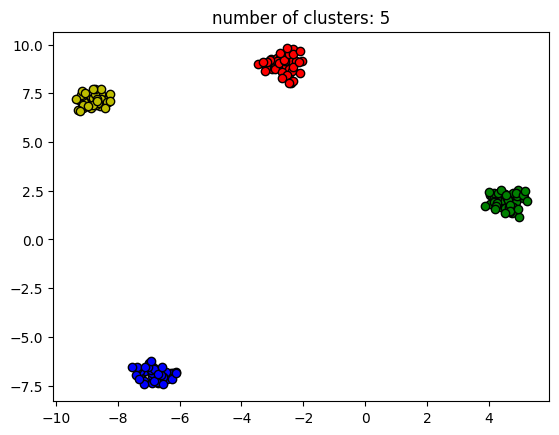

In [15]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(labels)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_sample_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = x[class_member_mask & ~core_sample_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()